In [5]:
# Needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [6]:
genome_LmSIDER2a = pd.read_csv("./output_csv/Hallmarks_LmSIDER2a.csv", header=0, sep=",")
genome_LmSIDER2a.head()

,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,75923,75949,plus,ACCTCAGCGTGGCATCCCAGGGTCCAG
1,LinJ.03,263663,263691,plus,ACCCCTCGCGGTGCAGGAAGCCGAGCAGC
2,LinJ.03,281600,281615,plus,AAGCCGAGCAGCTCCC
3,LinJ.04,331652,331589,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
4,LinJ.04,362905,362968,plus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...


In [7]:
genome_LmSIDER2b = pd.read_csv("./output_csv/Hallmarks_LmSIDER2b.csv", header=0, sep=",")
genome_LmSIDER2b.head()

,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,24215,24251,plus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
1,LinJ.01,35816,35780,minus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
2,LinJ.01,55428,55392,minus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
3,LinJ.01,76012,76048,plus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
4,LinJ.02,204357,204336,minus,GGGGAGGTCAGAGCGATGTATC


In [8]:
mine_LmSIDER2a = pd.read_csv("./output_csv/Mine_Hallmarks_LmSIDER2a.csv", header=None, sep=",")
mine_LmSIDER2a.columns = genome_LmSIDER2a.columns
mine_LmSIDER2a.head()

,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,75659,76526,plus,GAGCGCCGCTGAGCAGGCAAGCGAGGCAACCTACGAAAACATGGCA...
1,LinJ.04,18901,19756,plus,TCTCGTGCTCTGCTGCTGTCACTCTCTTTTTTTTTTCACAACATGT...
2,LinJ.04,426702,427499,plus,CCCGCACGCCGACCCACCGCGTGGTGGCAAGCAACTTTGCACACGT...
3,LinJ.04,437658,438373,plus,TTCTATACCCTGATGACGAGGAGTGCAACTCAGCGTGGTATCACAT...
4,LinJ.05,151787,152786,plus,GAGAGCGACGATGCGCTTTGGGCGCGGTTCTTGGCTGCTGCCCAGG...


In [9]:
mine_LmSIDER2b = pd.read_csv("./output_csv/Mine_Hallmarks_LmSIDER2b.csv", header=None, sep=",")
mine_LmSIDER2b.columns = genome_LmSIDER2b.columns
mine_LmSIDER2b.head()

,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,24093,24791,plus,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...
1,LinJ.01,35316,36160,plus,GAGGTGGAGGCCGCTCTGCCCCCCCCGCCGCCGAGTGCTGCAGGCA...
2,LinJ.01,54885,55772,plus,TGTTTGGTCTTCCGCGTGTCCGTTTTCGCTGCCGCACACTGCGAGG...
3,LinJ.01,75659,76526,plus,GAGCGCCGCTGAGCAGGCAAGCGAGGCAACCTACGAAAACATGGCA...
4,LinJ.02,314166,314781,plus,GGTGGTGCGGTGATGCACGACACGCGCACCATGCACATTTCCGTTG...


In [10]:
# Let's count how many times row[1] > row[2] for each row in the dataframe
print((genome_LmSIDER2a["sstart"] < genome_LmSIDER2a["send"]).value_counts())
print("=" * 50)
print((genome_LmSIDER2b["sstart"] < genome_LmSIDER2b["send"]).value_counts())
print("=" * 50)
print((mine_LmSIDER2a["sstart"] < mine_LmSIDER2a["send"]).value_counts())
print("=" * 50)
print((mine_LmSIDER2b["sstart"] < mine_LmSIDER2b["send"]).value_counts())

False    139
True     119
Name: count, dtype: int64
True     317
False    303
Name: count, dtype: int64
True    331
Name: count, dtype: int64
True    500
Name: count, dtype: int64


Probably all "minus" values are inverted so let's move its columns

In [11]:
# Let's change values from row["sed"] to row["start"] when row["sstrand"] == "minus"
def change_row_values(df):
    """
    Change values from row["sed"] to row["start"] when row["sstrand"] == "minus"
    """
    value_start = df.loc[df["sstrand"] == "minus", "sstart"].copy()
    value_minus = df.loc[df["sstrand"] == "minus", "send"].copy()
    df.loc[df["sstrand"] == "minus", "sstart"] = value_minus
    df.loc[df["sstrand"] == "minus", "send"] = value_start

    return df

genome_LmSIDER2a = change_row_values(genome_LmSIDER2a)
genome_LmSIDER2a[genome_LmSIDER2a["sstrand"] == "minus"].head()


,sseqid,sstart,send,sstrand,sseq
3,LinJ.04,331589,331652,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
5,LinJ.04,391430,391493,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
6,LinJ.04,394549,394612,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
7,LinJ.04,427123,427137,minus,CTCAGCGTGGTATCA
9,LinJ.05,110382,110396,minus,GGAAGCCGAGCAGCT


In [12]:
# Let's check the maximun len() for the row["sseq"]
print(genome_LmSIDER2a["sseq"].apply(len).max())

89


In [13]:
# Now for "genome_LmSIDER2b"
genome_LmSIDER2b = change_row_values(genome_LmSIDER2b)
genome_LmSIDER2b[genome_LmSIDER2b["sstrand"] == "minus"].head()

,sseqid,sstart,send,sstrand,sseq
1,LinJ.01,35780,35816,minus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
2,LinJ.01,55392,55428,minus,CCCTGCCAACGCCGAACCACTTCTGGTGCTGACAGGG
4,LinJ.02,204336,204357,minus,GGGGAGGTCAGAGCGATGTATC
5,LinJ.02,259346,259387,minus,CCCTTCCAACGCCGAGCCGCTTCTCGTTGTGACAGGGTCCAG
9,LinJ.04,19249,19320,minus,CCCTGCCAAGTGCACAACCACCTCTGGTGGTGACAGGGTCAAGTGC...


In [14]:
# Let's check the maximun len() for the row["sseq"]
print(genome_LmSIDER2b["sseq"].apply(len).max())

82


In [15]:
# last check
print((genome_LmSIDER2a["sstart"] < genome_LmSIDER2a["send"]).value_counts())
print("=" * 50)
print((genome_LmSIDER2b["sstart"] < genome_LmSIDER2b["send"]).value_counts())

True    258
Name: count, dtype: int64
True    620
Name: count, dtype: int64


# Now it's the turn to compare data

 ## LmSIDER2a hallmarks

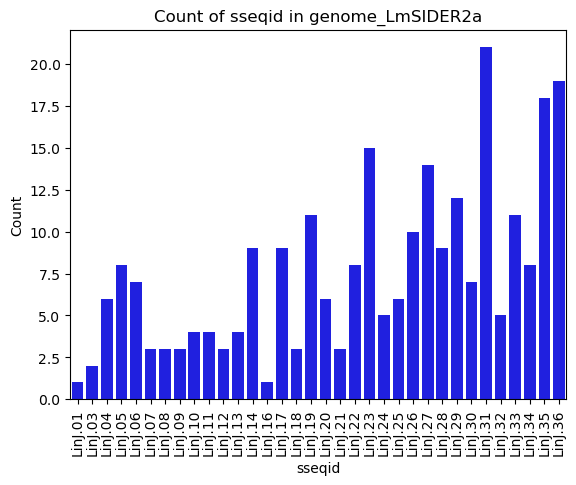

In [19]:
# Plot the frequency by chromosome
sns.countplot(x="sseqid", data=genome_LmSIDER2a,color="blue")
plt.title("Count of sseqid in genome_LmSIDER2a")
plt.xlabel("sseqid")
plt.ylabel("Count")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

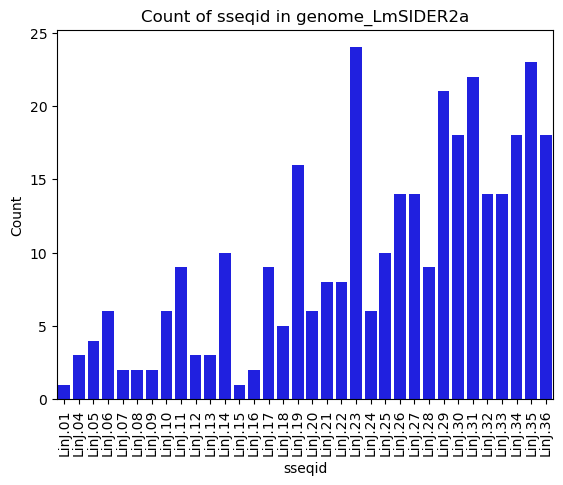

In [21]:
# Count the number of frequency by chromosome
sns.countplot(x="sseqid", data=mine_LmSIDER2a, color="blue")
plt.title("Count of sseqid in genome_LmSIDER2a")
plt.xlabel("sseqid")
plt.ylabel("Count")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

In [22]:
# Let's group them by chromosome
grouped_genome_LmSIDER2a = genome_LmSIDER2a.groupby("sseqid")
grouped_mine_LmSIDER2a = mine_LmSIDER2a.groupby("sseqid") 

In [23]:
# Define a function to get the indexes for the intersection between both dataframes
def comparative_grouping_data(data_frame1, data_frame2):
    """
    Grouped data frames
    """
    index_array_g = []  # Will save index for the intersection between both dataframes in genome data
    index_array_m = []  # Will save index for the intersection between both dataframes in mine data
    group_name_g = []  # Will save the name of the chromosome
    index_final_g = []  # Will save the final index for the intersection between both dataframes in genome data

    for _, (name_genome, group_genome) in enumerate(data_frame1):
        index_both_g = []  # Will save index for the intersection between both dataframes for each chromosome
        index_both_m = []

        for _, (name_mine, group_mine) in enumerate(data_frame2):

            if name_genome == name_mine:  # Check if the chromosome name is the same
                # print(f"Analyzing chromosome {name_genome} for genome data")
                # print(f"Analyzing chromosome {name_mine} for mine data")
                # print(f"\tGenome dataframe has {len(group_genome)} elements")
                # print(f"\tMine dataframe has {len(group_mine)} elements")

                for index, (_, hallmark) in enumerate(group_genome.iterrows()):
                    for index2, (_, element) in enumerate(group_mine.iterrows()):
                        lower_end = element["sstart"]
                        upper_end = element["send"]
                        if np.logical_and(lower_end <= hallmark["sstart"], hallmark["send"] <= upper_end):
                            # print(f"Hallmark element in index {index} is inside SIDER element with index {index2}")
                            index_both_g.append(index)
                            index_both_m.append(index2)
                            index_final_g.append(hallmark.name)
                
                index_array_g.append(index_both_g)
                index_array_m.append(index_both_m)
                group_name_g.append(name_genome)
                # print("=" * 50)

            continue
    
    return index_final_g  # get the index for the first dataframe

In [24]:
# Call the function with the first data frame being "grouped_genome_LmSIDER2a"
LmSIDER2a_index = comparative_grouping_data(grouped_genome_LmSIDER2a, grouped_mine_LmSIDER2a)
print(LmSIDER2a_index)

[0, 7, 8, 12, 14, 15, 16, 17, 19, 21, 22, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 123, 124, 125, 127, 128, 129, 130, 132, 133, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 183, 184, 185, 187, 188, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257]


In [25]:
# Drop the indexes, so we get the ones that are not in the mine data
genome_LmSIDER2a_not_in_mine = genome_LmSIDER2a.drop(LmSIDER2a_index)
print(len(genome_LmSIDER2a_not_in_mine))
print(type(genome_LmSIDER2a_not_in_mine))
genome_LmSIDER2a_not_in_mine.head()

49
<class 'pandas.core.frame.DataFrame'>


,sseqid,sstart,send,sstrand,sseq
1,LinJ.03,263663,263691,plus,ACCCCTCGCGGTGCAGGAAGCCGAGCAGC
2,LinJ.03,281600,281615,plus,AAGCCGAGCAGCTCCC
3,LinJ.04,331589,331652,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
4,LinJ.04,362905,362968,plus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...
5,LinJ.04,391430,391493,minus,ACACCTCAGCGCGTGGTGCCTCAGCGGCCAGTGCACGCCCACTCTC...


In [26]:
# Let's read the SIDER original data from our software
positive_SIDER_data = pd.read_csv("./genome_data/positives_testing_elements.csv",
                                  header=None, sep=",")
positive_SIDER_data = positive_SIDER_data[[0, 2, 3, 4, 5]]
positive_SIDER_data.columns = ["sseqid", "sstart", "send", "sstrand", "sseq"]
print(len(positive_SIDER_data))
positive_SIDER_data.head()

1951


,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,1,173,plus,ACACCAGTACACCAGTACACCAGTACACCAGTACACCAGTACACCA...
1,LinJ.01,24093,24791,plus,GGGGGAGGCGGGGGAGGCGGGGGGCACGCACCTCCATGCGTGGCAT...
2,LinJ.01,35316,36160,plus,GAGGTGGAGGCCGCTCTGCCCCCCCCGCCGCCGAGTGCTGCAGGCA...
3,LinJ.01,39698,40589,plus,CTCACCCTCATCCCACCCCTCCTCGTCCATCGACGGGAGTGGGCGG...
4,LinJ.01,54885,55772,plus,TGTTTGGTCTTCCGCGTGTCCGTTTTCGCTGCCGCACACTGCGAGG...


In [27]:
# Now let's group it by chromosome
grouped_positive_SIDER_data = positive_SIDER_data.groupby("sseqid")
grouped_genome_LmSIDER2a_not_in_mine = genome_LmSIDER2a_not_in_mine.groupby("sseqid")

In [28]:
print(type(grouped_positive_SIDER_data), type(grouped_genome_LmSIDER2a_not_in_mine), sep="\n")

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [29]:
# Let's call the function
LmSIDER2a_index2 = comparative_grouping_data(grouped_genome_LmSIDER2a_not_in_mine, grouped_positive_SIDER_data)
print(len(LmSIDER2a_index2))
print(LmSIDER2a_index2)

0
[]


Because the intersection indexes number is 0. That means that there are 49 elements not found there. Let's check in the negative data.

In [30]:
# Read negative data:
negative_SIDER_data = pd.read_csv("./genome_data/negatives_testing_elements.csv",
                                  header=None, sep=",")
negative_SIDER_data = negative_SIDER_data[[0, 2, 3, 4, 5]]
negative_SIDER_data.columns = ["sseqid", "sstart", "send", "sstrand", "sseq"]
print(len(negative_SIDER_data))
negative_SIDER_data.head()

1058


,sseqid,sstart,send,sstrand,sseq
0,LinJ.01,13302,14301,plus,GTCGACCGTGCAAGAGGAACTCAACACCGCTCTACTCGGCGTGTCA...
1,LinJ.01,72760,73757,plus,CGTGTGTTTGTGAGGGGTAAGAATCGACCATGCATCAACGACTGCG...
2,LinJ.01,113760,114358,plus,CAGCGCCATGCACGACATGGCCGCTGACGTCCGTAGCCCTAACTCG...
3,LinJ.01,214971,215970,plus,GGGTGTGTACACGAACGTCGAGCCGTGCCGCGGAGCCCCGATGCAC...
4,LinJ.01,272910,273122,plus,TCTCTGTCTTCACTTCCTCGGTGCGTCTGGTGGTGGTTGCGCCTCT...


In [31]:
# Let's group it by chromosome
grouped_negative_SIDER_data = negative_SIDER_data.groupby("sseqid")

In [32]:
# Let's call the function
LmSIDER2a_index3 = comparative_grouping_data(grouped_genome_LmSIDER2a_not_in_mine, grouped_negative_SIDER_data)
print(len(LmSIDER2a_index3))
print(LmSIDER2a_index3)

9
[3, 4, 5, 6, 10, 11, 24, 29, 152]


That means there are 9 elements localized in our negative data. Let's see what's left

In [33]:
genome_LmSIDER2a_NOTIN_pos_and_neg = genome_LmSIDER2a_not_in_mine.drop(LmSIDER2a_index3)
print(len(genome_LmSIDER2a_NOTIN_pos_and_neg))
print(type(genome_LmSIDER2a_NOTIN_pos_and_neg))
genome_LmSIDER2a_NOTIN_pos_and_neg.head()

40
<class 'pandas.core.frame.DataFrame'>


,sseqid,sstart,send,sstrand,sseq
1,LinJ.03,263663,263691,plus,ACCCCTCGCGGTGCAGGAAGCCGAGCAGC
2,LinJ.03,281600,281615,plus,AAGCCGAGCAGCTCCC
9,LinJ.05,110382,110396,minus,GGAAGCCGAGCAGCT
13,LinJ.05,360290,360334,plus,GGGAACACCTCAGCGCGGTATCCAGGCACCAGTACCCACCACTCT
18,LinJ.06,203064,203091,minus,CACCCACACTCTGTGAGTTTGCCGAGCA


## LmSIDER2b hallmarks
Now let's do the same but with LmSIDERb

In [34]:
# The data needed:
print(genome_LmSIDER2b.shape)
print(mine_LmSIDER2b.shape)

(620, 5)
(500, 5)


In [35]:
# Check coordinates
print((genome_LmSIDER2b["sstart"] < genome_LmSIDER2b["send"]).value_counts())
print("=" * 50)
print((mine_LmSIDER2b["sstart"] < mine_LmSIDER2b["send"]).value_counts())

True    620
Name: count, dtype: int64
True    500
Name: count, dtype: int64


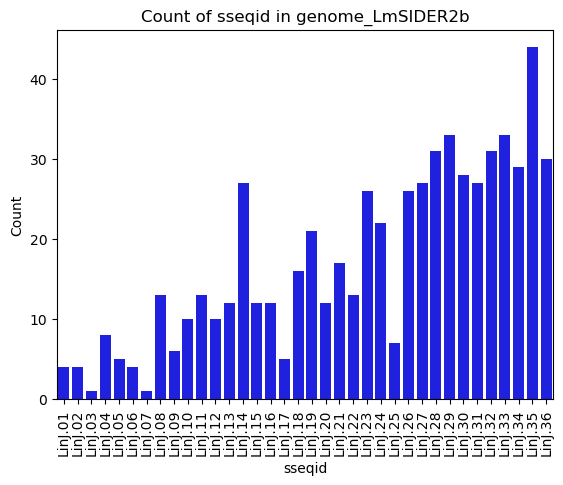

In [37]:
sns.countplot(x="sseqid", data=genome_LmSIDER2b, color="blue")
plt.title("Count of sseqid in genome_LmSIDER2b")
plt.xlabel("sseqid")
plt.ylabel("Count")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

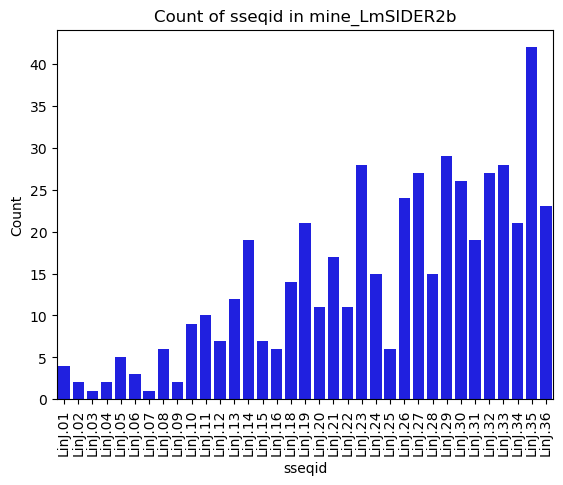

In [38]:
sns.countplot(x="sseqid", data=mine_LmSIDER2b, color="blue")
plt.title("Count of sseqid in mine_LmSIDER2b")
plt.xlabel("sseqid")
plt.ylabel("Count")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.show()

In [39]:
# Group the data
grouped_genome_LmSIDER2b = genome_LmSIDER2b.groupby("sseqid")
grouped_mine_LmSIDER2b = mine_LmSIDER2b.groupby("sseqid")
print(type(grouped_genome_LmSIDER2b), type(grouped_mine_LmSIDER2b), sep="\n")

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [40]:
# Let's check how many elements from the 620 are in the mine data
LmSIDER2b_index = comparative_grouping_data(grouped_genome_LmSIDER2b, grouped_mine_LmSIDER2b)
print(len(LmSIDER2b_index))
print(LmSIDER2b_index)

493
[0, 1, 2, 3, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 29, 30, 35, 36, 37, 38, 40, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 67, 68, 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 147, 148, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 

In [41]:
# Let's see which ones are not in our data
genome_LmSIDER2b_not_in_mine = genome_LmSIDER2b.drop(LmSIDER2b_index)
print(len(genome_LmSIDER2b_not_in_mine))
print(type(genome_LmSIDER2b_not_in_mine))
genome_LmSIDER2b_not_in_mine.head()

127
<class 'pandas.core.frame.DataFrame'>


,sseqid,sstart,send,sstrand,sseq
4,LinJ.02,204336,204357,minus,GGGGAGGTCAGAGCGATGTATC
5,LinJ.02,259346,259387,minus,CCCTTCCAACGCCGAGCCGCTTCTCGTTGTGACAGGGTCCAG
10,LinJ.04,331482,331541,minus,CCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTGAGAGGG...
11,LinJ.04,363010,363075,plus,GCCGGGCCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTG...
12,LinJ.04,391323,391382,minus,CCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTGAGAGGG...


In [42]:
# Now let's compare it with the original positive data from our software
# Group this last data frame
grouped_genome_LmSIDER2b_not_in_mine = genome_LmSIDER2b_not_in_mine.groupby("sseqid")
print(type(grouped_genome_LmSIDER2b_not_in_mine))
print(type(grouped_positive_SIDER_data))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [43]:
# Call function
LmSIDER2b_index2 = comparative_grouping_data(grouped_genome_LmSIDER2b_not_in_mine, grouped_positive_SIDER_data)
print(len(LmSIDER2b_index2))
print(LmSIDER2b_index2)

105
[4, 14, 15, 24, 27, 28, 31, 32, 33, 34, 39, 41, 42, 43, 44, 53, 58, 64, 66, 75, 77, 100, 101, 102, 103, 104, 105, 106, 107, 108, 120, 121, 122, 123, 124, 134, 137, 138, 139, 142, 143, 144, 145, 146, 149, 188, 222, 223, 234, 254, 267, 278, 334, 336, 339, 340, 341, 342, 349, 350, 351, 352, 353, 361, 362, 363, 364, 380, 390, 391, 392, 416, 427, 428, 432, 437, 438, 439, 457, 460, 487, 498, 500, 502, 517, 519, 520, 524, 527, 532, 543, 546, 547, 550, 551, 552, 584, 585, 603, 605, 610, 613, 614, 615, 616]


In [44]:
# Filter the ones that are not in our data
genome_LmSIDER2b_NOTIN_pos = genome_LmSIDER2b_not_in_mine.drop(LmSIDER2b_index2)
print(len(genome_LmSIDER2b_NOTIN_pos))
print(type(genome_LmSIDER2b_NOTIN_pos))
genome_LmSIDER2b_NOTIN_pos.head()

22
<class 'pandas.core.frame.DataFrame'>


,sseqid,sstart,send,sstrand,sseq
5,LinJ.02,259346,259387,minus,CCCTTCCAACGCCGAGCCGCTTCTCGTTGTGACAGGGTCCAG
10,LinJ.04,331482,331541,minus,CCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTGAGAGGG...
11,LinJ.04,363010,363075,plus,GCCGGGCCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTG...
12,LinJ.04,391323,391382,minus,CCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTGAGAGGG...
13,LinJ.04,394442,394501,minus,CCACTTCGCGTGGTGGCAGGGCCAGGGTGCCTAGGGCGTGAGAGGG...


In [45]:
# Let's check with the negative data
# Group this last data frame
grouped_genome_LmSIDER2b_NOTIN_pos = genome_LmSIDER2b_NOTIN_pos.groupby("sseqid")
print(type(grouped_genome_LmSIDER2b_NOTIN_pos), type(grouped_negative_SIDER_data), sep="\n")

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [46]:
# Call function to see if they are localized in negative data
LmSIDER2b_index3 = comparative_grouping_data(grouped_genome_LmSIDER2b_NOTIN_pos, grouped_negative_SIDER_data)
print(len(LmSIDER2b_index3))
print(type(LmSIDER2b_index3))
print(LmSIDER2b_index3)

12
<class 'list'>
[5, 10, 11, 12, 13, 69, 140, 141, 153, 285, 441, 569]


In [47]:
# Check the ones that are not in both data
genome_LmSIDER2b_NOTIN_pos_and_neg = genome_LmSIDER2b_NOTIN_pos.drop(LmSIDER2b_index3)
print(len(genome_LmSIDER2b_NOTIN_pos_and_neg))
print(type(genome_LmSIDER2b_NOTIN_pos_and_neg))
genome_LmSIDER2b_NOTIN_pos_and_neg.head()

10
<class 'pandas.core.frame.DataFrame'>


,sseqid,sstart,send,sstrand,sseq
85,LinJ.13,507535,507606,plus,CCCTGCCCATGCCGAACCACTTCGGGTGGTGGCGGGGGTTCCCGTG...
109,LinJ.14,430615,430655,plus,CCCTGCCAATGCTGAAGCACCCCTGGTGGCGCCAGGGCCAG
266,LinJ.24,478722,478742,minus,GTGGTGACAGGGTCGTGTGCC
348,LinJ.28,520036,520067,plus,CCCATGCCAAATGCCGAACCACCTCTGGTGGT
410,LinJ.30,276569,276583,minus,GGGGAGGTCAGAGCG


## Summary

## LmSIDER2a

In [48]:
print(f"(Data A) Number of LmSIDER2a hallmarks in L. infantum genome: {len(genome_LmSIDER2a)}",
      f"\n(Data B) Number of LmSIDER2a hallmarks in our SIDER positive data: {len(mine_LmSIDER2a)}",
      f"\n(Data C) Number of elements in our SIDER positive data from our software: {len(positive_SIDER_data)}",
      f"\n(Data D) Number of elements in our SIDER negative data from our software: {len(negative_SIDER_data)}",
      "\n",
      "=" * 50,
      f"\n\tElements from Data A found in Data B: {len(LmSIDER2a_index)}",
      f"\n\tElements from Data A not found in Data B: {len(genome_LmSIDER2a_not_in_mine)}",
      f"\n\t\tFound in Data C: {len(LmSIDER2a_index2)}",
      f"\n\t\tFound in Data D: {len(LmSIDER2a_index3)}",
      f"\n\t\tNot found in Data C and Data D: {len(genome_LmSIDER2a_NOTIN_pos_and_neg)}",
      )

(Data A) Number of LmSIDER2a hallmarks in L. infantum genome: 258 
(Data B) Number of LmSIDER2a hallmarks in our SIDER positive data: 331 
(Data C) Number of elements in our SIDER positive data from our software: 1951 
(Data D) Number of elements in our SIDER negative data from our software: 1058 
	Elements from Data A found in Data B: 209 
	Elements from Data A not found in Data B: 49 
		Found in Data C: 0 
		Found in Data D: 9 
		Not found in Data C and Data D: 40


In [52]:
genome_LmSIDER2a_NOTIN_pos_and_neg.to_csv("./output_csv/new/genome_LmSIDER2a_NOTIN_pos_and_neg.csv", header=True, index=False, sep=",")

## LmSIDER2b

In [49]:
print(f"(Data A) Number of LmSIDER2b hallmarks in L. infantum genome: {len(genome_LmSIDER2b)}",
      f"\n(Data B) Number of LmSIDER2b hallmarks in our SIDER positive data: {len(mine_LmSIDER2b)}",
      f"\n(Data C) Number of elements in our SIDER positive data from our software: {len(positive_SIDER_data)}",
      f"\n(Data D) Number of elements in our SIDER negative data from our software: {len(negative_SIDER_data)}",
      "\n",
      "=" * 50,
      f"\n\tElements from Data A found in Data B: {len(LmSIDER2b_index)}",
      f"\n\tElements from Data A not found in Data B: {len(genome_LmSIDER2b_not_in_mine)}",
      f"\n\t\tFound in Data C: {len(LmSIDER2b_index2)}",
      f"\n\t\tFound in Data D: {len(LmSIDER2b_index3)}",
      f"\n\t\tNot found in Data C and Data D: {len(genome_LmSIDER2b_NOTIN_pos_and_neg)}",
      )

(Data A) Number of LmSIDER2b hallmarks in L. infantum genome: 620 
(Data B) Number of LmSIDER2b hallmarks in our SIDER positive data: 500 
(Data C) Number of elements in our SIDER positive data from our software: 1951 
(Data D) Number of elements in our SIDER negative data from our software: 1058 
	Elements from Data A found in Data B: 493 
	Elements from Data A not found in Data B: 127 
		Found in Data C: 105 
		Found in Data D: 12 
		Not found in Data C and Data D: 10


In [53]:
genome_LmSIDER2b_NOTIN_pos_and_neg.to_csv("./output_csv/new/genome_LmSIDER2b_NOTIN_pos_and_neg.csv", header=True, index=False, sep=",")

In [50]:
# # To save the data
# import dill
# dill.dump_session('./variables_saves/workspace.db')

# # to import the data
# import dill
# dill.load_session('./variables_saves/workspace.db')